<a href="https://colab.research.google.com/github/RKCZ/bci-classifier/blob/master/bciclassifier_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
# clones the repository with constants definitions and data processing methods
!rm -r bci-classifier/
!git clone https://github.com/RKCZ/bci-classifier.git
%cd bci-classifier/

rm: cannot remove 'bci-classifier/': No such file or directory
Cloning into 'bci-classifier'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (203/203), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 203 (delta 97), reused 161 (delta 66), pack-reused 0
Receiving objects: 100% (203/203), 42.09 KiB | 4.21 MiB/s, done.
Resolving deltas: 100% (97/97), done.
/content/bci-classifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade scikit-learn
!pip install -U autoreject imbalanced-learn
!pip install -e .

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)
Requirement already up-to-date: autoreject in /usr/local/lib/python3.7/dist-packages (0.2.2)
Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.7/dist-packages (0.8.0)
Obtaining file:///content/bci-classifier
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Found existing installation: bciclassifier 0.1.0.dev0
    Can't uninstall 'bciclassifier'. No files were found to uninstall.
  Running setup.py develop for bciclassifier


In [ ]:
from bciclassifier.data_manager import DataManager
import numpy as np

# path to the data folder
data_path = "/content/drive/MyDrive/bciclassifier_data/"
# loads the data 
dm = DataManager(data_path)

Not setting metadata
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
50 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
200 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
50 matching events found
No baseline correction applied
0 projectio

In [ ]:
import bciclassifier.constants as consts
import mne

# applies a band-pass filter to the epochs
dm.data = dm.data.load_data().filter(l_freq=0.1, h_freq=30, method='iir')

Setting up band-pass filter from 0.1 - 30 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.10, 30.00 Hz: -6.02, -6.02 dB



In [ ]:
from autoreject import get_rejection_threshold

# computes a global rejection threshold
reject = get_rejection_threshold(dm.data, decim=2)

Estimating rejection dictionary for eeg


In [ ]:
print(reject)

# drops all rejected epochs
dm.data.drop_bad(reject=reject, verbose=False)

{'eeg': 6.911094494977535e-05}


<Epochs |  21507 events (all good), -0.199219 - 0.998047 sec, baseline off, ~1.57 GB, data loaded,
 'audio/test/subject_1/allNTARGETS/2': 161
 'audio/test/subject_1/allNTARGETS/9': 174
 'audio/test/subject_1/allTARGETS/2': 28
 'audio/test/subject_1/allTARGETS/9': 27
 'audio/test/subject_10/allNTARGETS/23': 170
 'audio/test/subject_10/allNTARGETS/25': 155
 'audio/test/subject_10/allNTARGETS/26': 137
 'audio/test/subject_10/allTARGETS/23': 40
 'audio/test/subject_10/allTARGETS/25': 34
 'audio/test/subject_10/allTARGETS/26': 39
 'audio/test/subject_11/allNTARGETS/19': 154
 'audio/test/subject_11/allNTARGETS/21': 142
 'audio/test/subject_11/allTARGETS/19': 39
 'audio/test/subject_11/allTARGETS/21': 41
 'audio/test/subject_12/allNTARGETS/20': 148
 'audio/test/subject_12/allNTARGETS/22': 146
 'audio/test/subject_12/allTARGETS/20': 31
 'audio/test/subject_12/allTARGETS/22': 33
 'audio/test/subject_13/allNTARGETS/18': 37
 'audio/test/subject_13/allNTARGETS/24': 14
 'audio/test/subject_13/allTARGETS/18': 9
 'audio/test/subject_13/allTARGETS/24': 4
 'audio/test/subject_14/allNTARGETS/17': 124
 'audio/test/subject_14/allNTARGETS/29': 103
 'audio/test/subject_14/allTARGETS/17': 16
 'audio/test/subject_14/allTARGETS/29': 14
 'audio/test/subject_15/allNTARGETS/28': 147
 'audio/test/subject_15/allNTARGETS/30': 121
 'audio/test/subject_15/allTARGETS/28': 34
 'audio/test/subject_15/allTARGETS/30': 35
 'audio/test/subject_16/allNTARGETS/31': 44
 'audio/test/subject_16/allNTARGETS/32': 28
 'audio/test/subject_16/allTARGETS/31': 11
 'audio/test/subject_16/allTARGETS/32': 7
 'audio/test/subject_2/allNTARGETS/1': 192
 'audio/test/subject_2/allNTARGETS/3': 148
 'audio/test/subject_2/allTARGETS/1': 42
 'audio/test/subject_2/allTARGETS/3': 24
 'audio/test/subject_3/allNTARGETS/10': 157
 'audio/test/subject_3/allNTARGETS/11': 169
 'audio/test/subject_3/allTARGETS/10': 19
 'audio/test/subject_3/allTARGETS/11': 23
 'audio/test/subject_4/allNTARGETS/5': 52
 'audio/test/subject_4/allNTARGETS/6': 121
 'audio/test/subject_4/allTARGETS/5': 11
 'audio/test/subject_4/allTARGETS/6': 27
 'audio/test/subject_5/allNTARGETS/15': 143
 'audio/test/subject_5/allNTARGETS/7': 111
 'audio/test/subject_5/allNTARGETS/8': 149
 'audio/test/subject_5/allTARGETS/15': 39
 'audio/test/subject_5/allTARGETS/7': 18
 'audio/test/subject_5/allTARGETS/8': 35
 'audio/test/subject_6/allNTARGETS/0': 133
 'audio/test/subject_6/allNTARGETS/4': 106
 'audio/test/subject_6/allTARGETS/0': 28
 'audio/test/subject_6/allTARGETS/4': 25
 'audio/test/subject_7/allNTARGETS/13': 34
 'audio/test/subject_7/allNTARGETS/16': 12
 'audio/test/subject_7/allTARGETS/13': 7
 'audio/test/subject_7/allTARGETS/16': 0
 'audio/test/subject_8/allNTARGETS/14': 3
 'audio/test/subject_8/allNTARGETS/27': 10
 'audio/test/subject_8/allTARGETS/14': 1
 'audio/test/subject_8/allTARGETS/27': 1
 'audio/test/subject_9/allNTARGETS/12': 62
 'audio/test/subject_9/allTARGETS/12': 17
 'audio/train/subject_1/allNTARGETS/2': 159
 'audio/train/subject_1/allTARGETS/2': 28
 'audio/train/subject_10/allNTARGETS/10': 184
 'audio/train/subject_10/allTARGETS/10': 43
 'audio/train/subject_11/allNTARGETS/9': 160
 'audio/train/subject_11/allTARGETS/9': 37
 'audio/train/subject_12/allNTARGETS/11': 138
 'audio/train/subject_12/allTARGETS/11': 23
 'audio/train/subject_13/allNTARGETS/13': 19
 'audio/train/subject_13/allTARGETS/13': 3
 'audio/train/subject_14/allNTARGETS/15': 123
 'audio/train/subject_14/allTARGETS/15': 33
 'audio/train/subject_15/allNTARGETS/12': 122
 'audio/train/subject_15/allTARGETS/12': 36
 'audio/train/subject_16/allNTARGETS/14': 51
 'audio/train/subject_16/allTARGETS/14': 7
 'audio/train/subject_2/allNTARGETS/3': 174
 'audio/train/subject_2/allTARGETS/3': 30
 'audio/train/subject_3/allNTARGETS/4': 160
 'audio/train/subject_3/allTARGETS/4': 29
 'audio/train/subject_4/allNTARGETS/0': 90
 'audio/train/subject_4/allTARGETS/0': 25
 'audio/train/subject_5/allNTARGETS/5': 94
 'audio/train/subject_5/allTARGETS/5': 20
 'audio/train/subje

In [ ]:
# baseline correction
dm.data.apply_baseline()
data_bandpass = dm.data

Applying baseline correction (mode: mean)


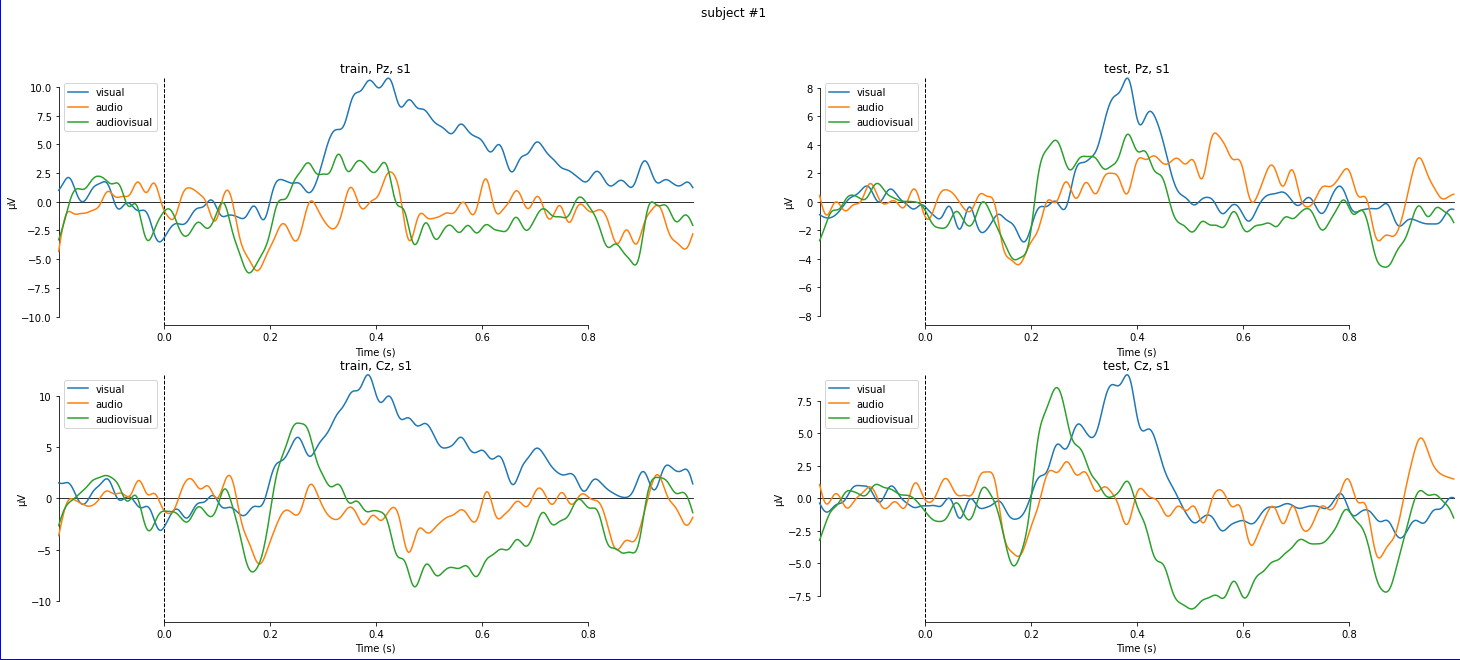

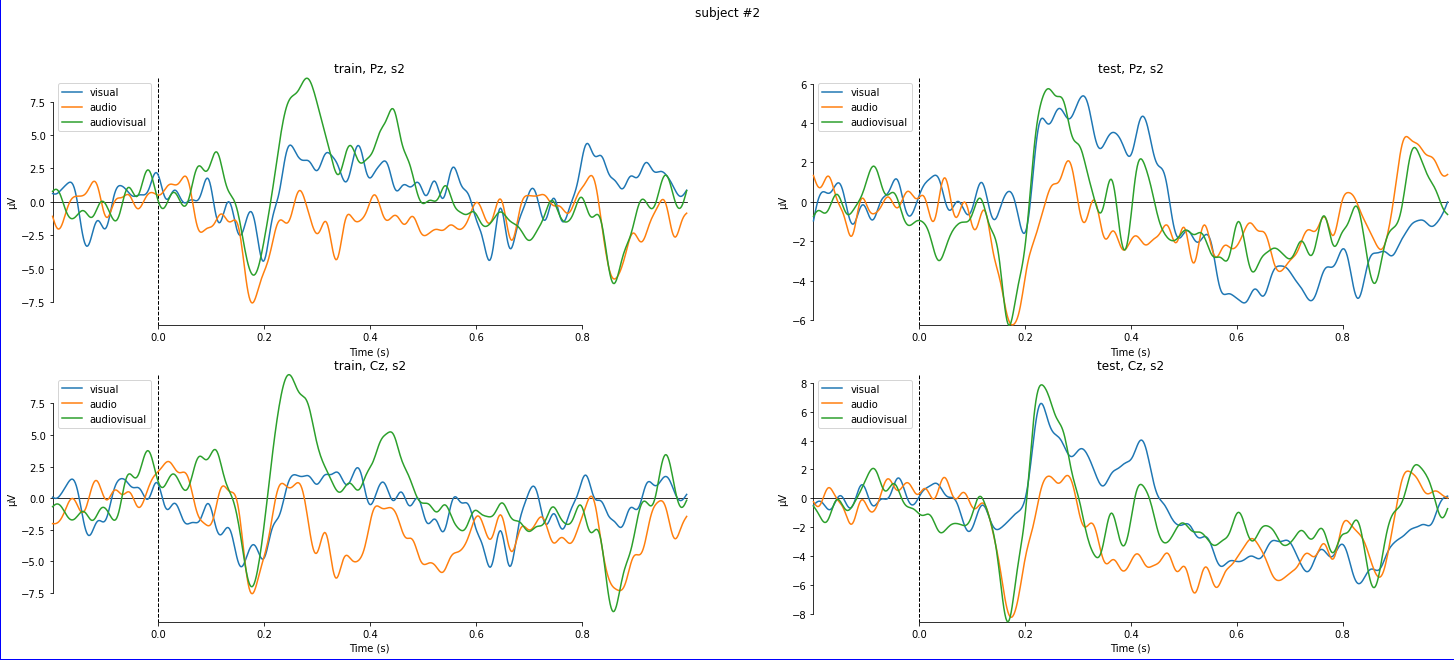

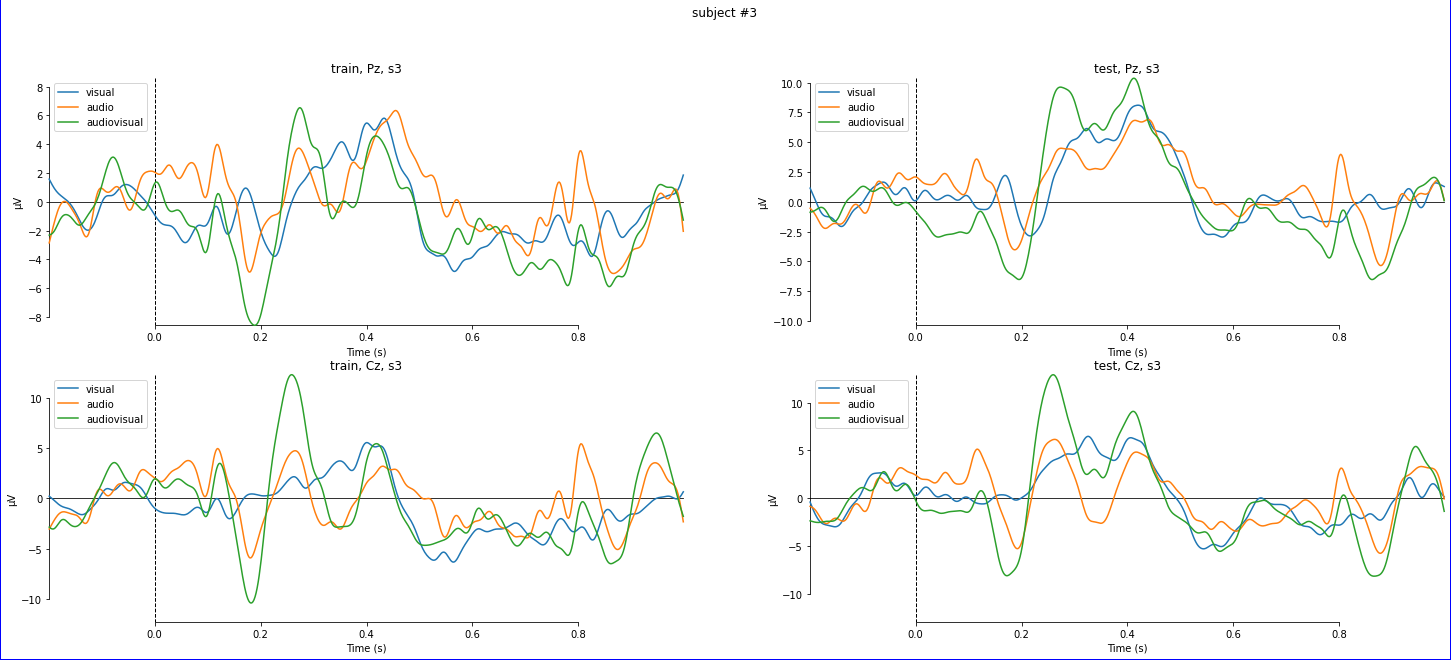

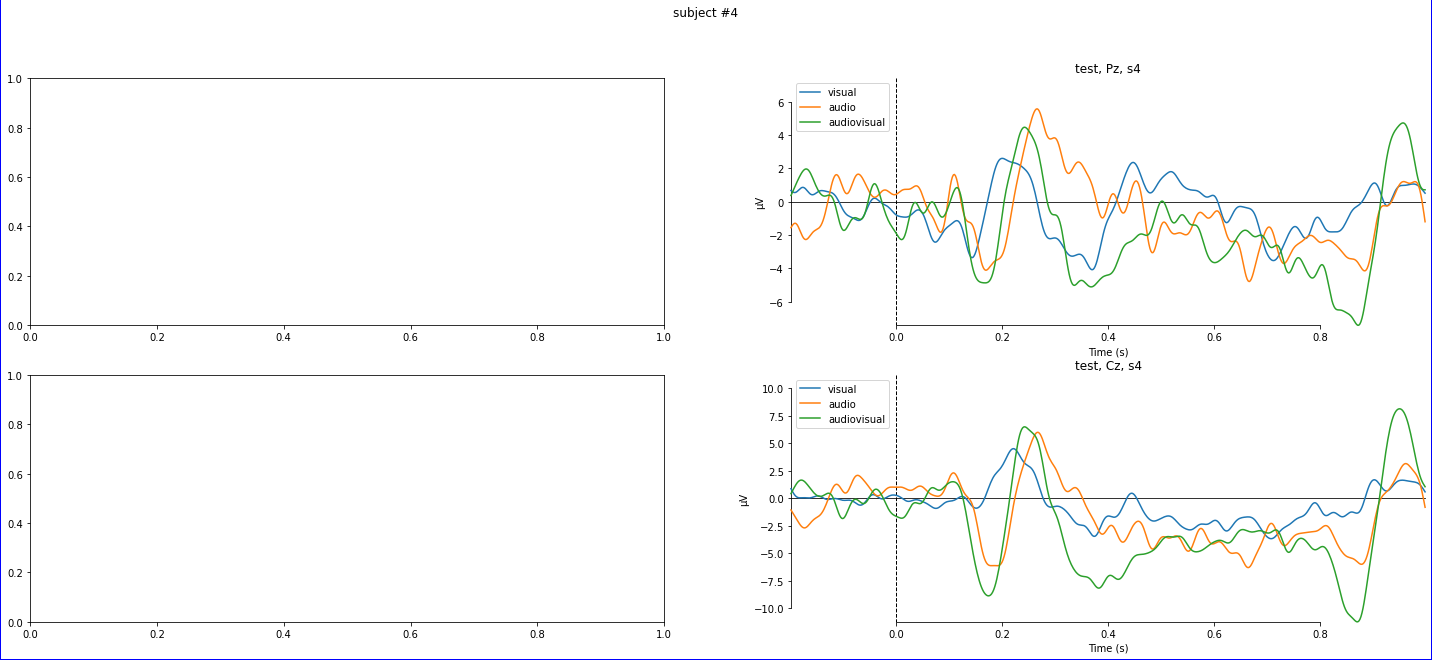

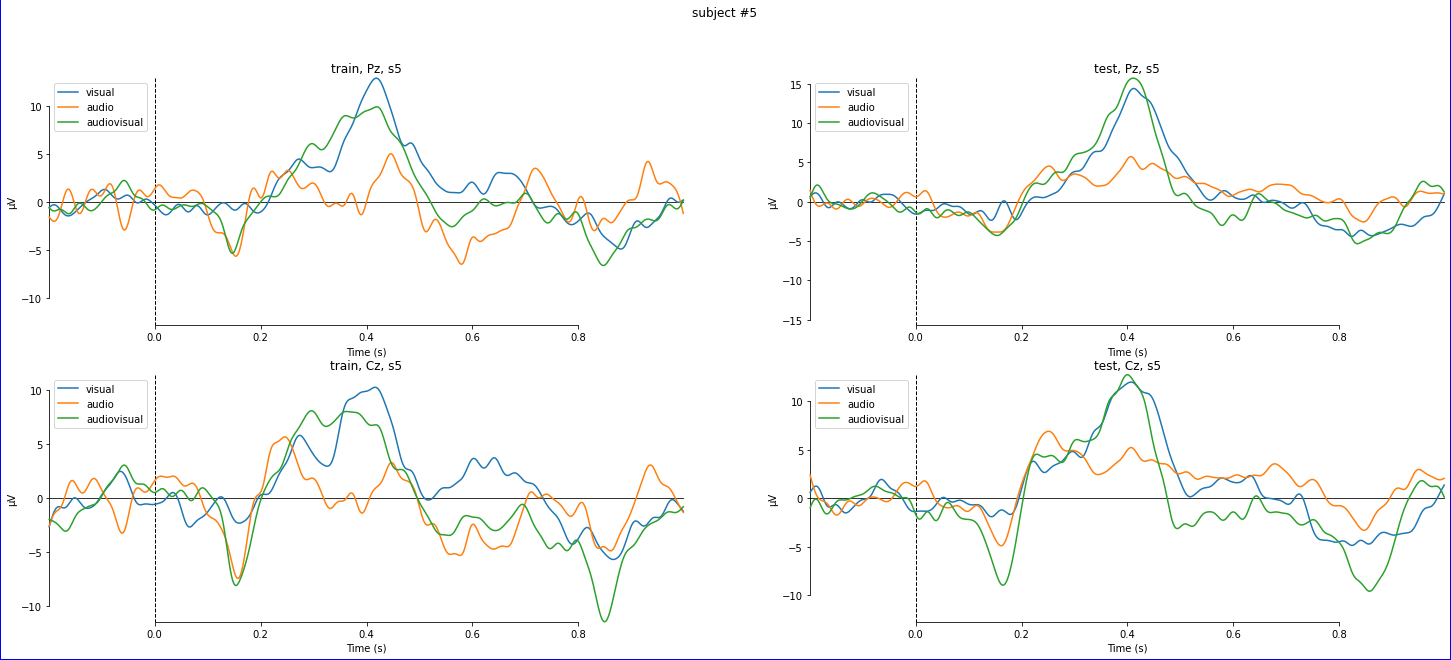

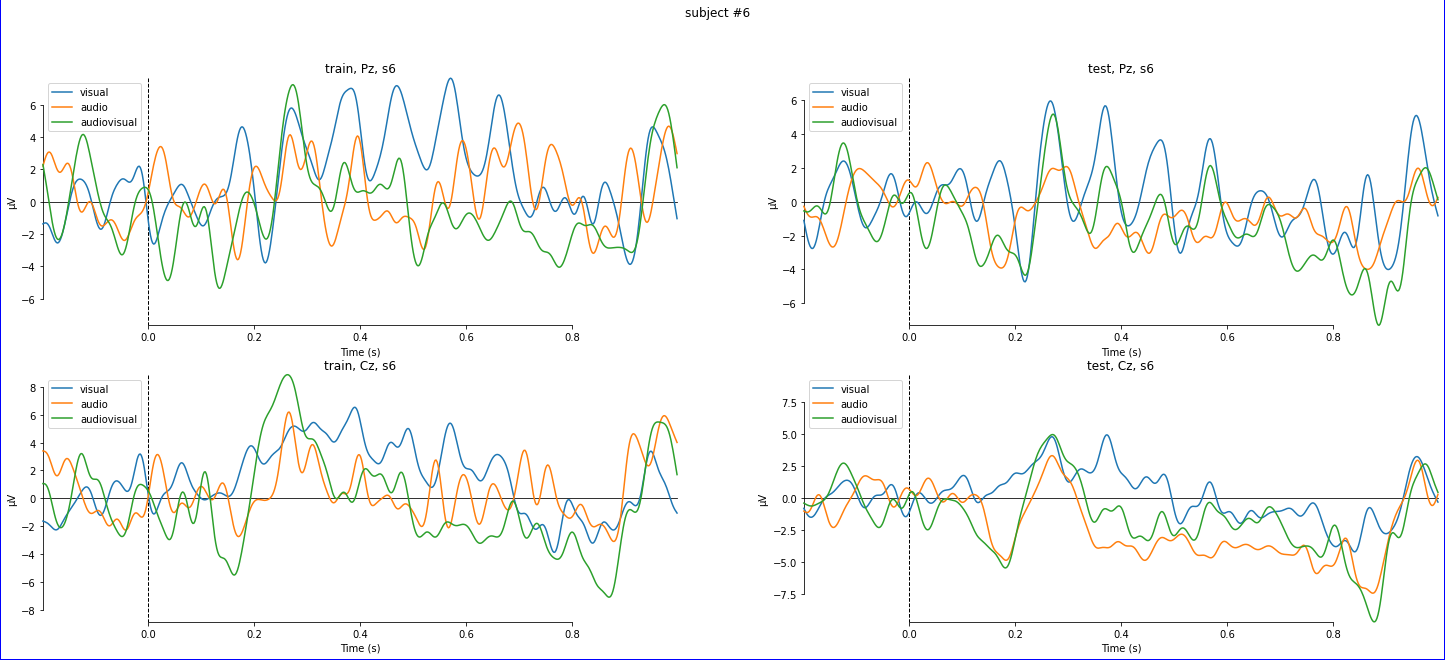

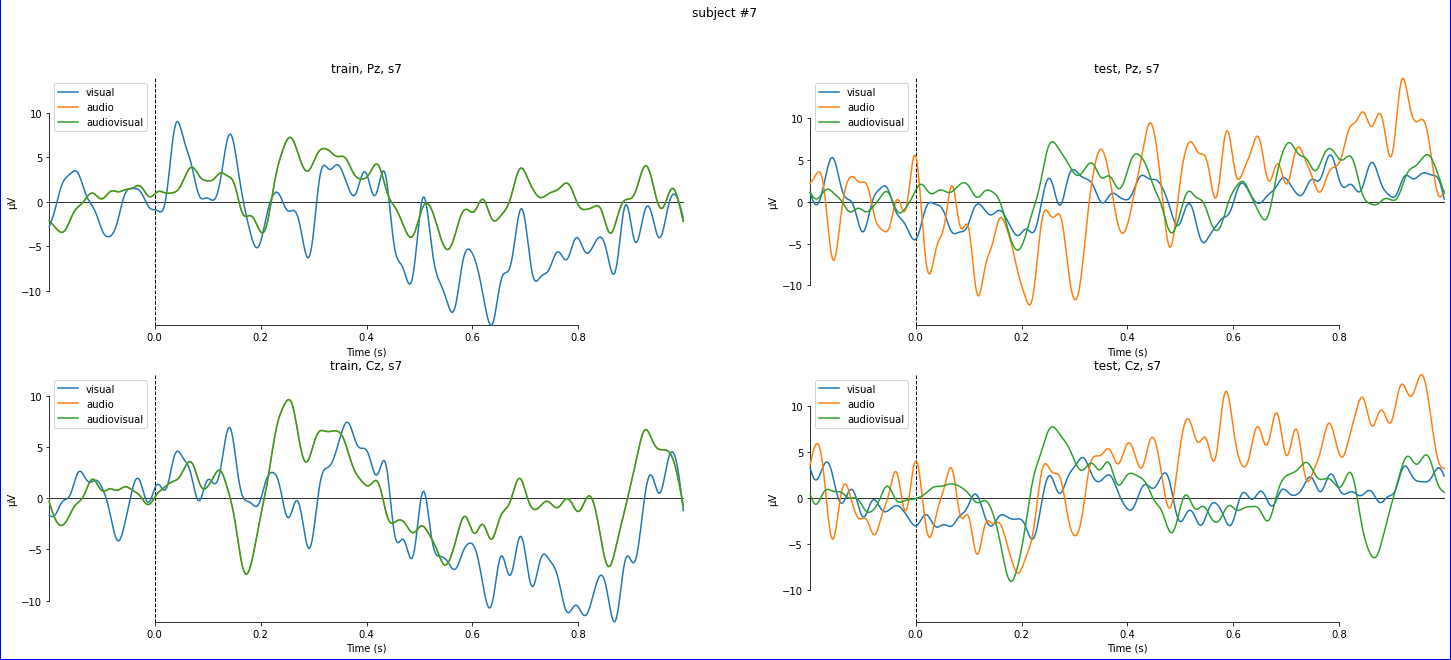

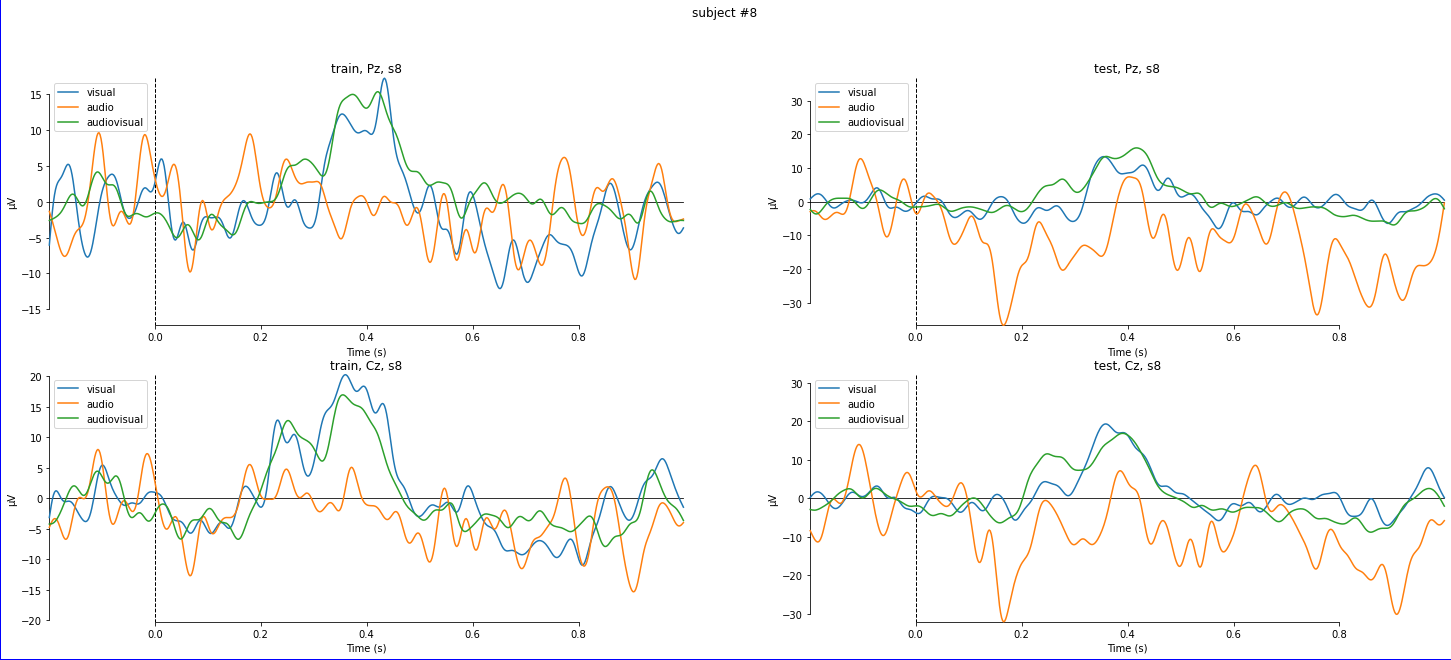

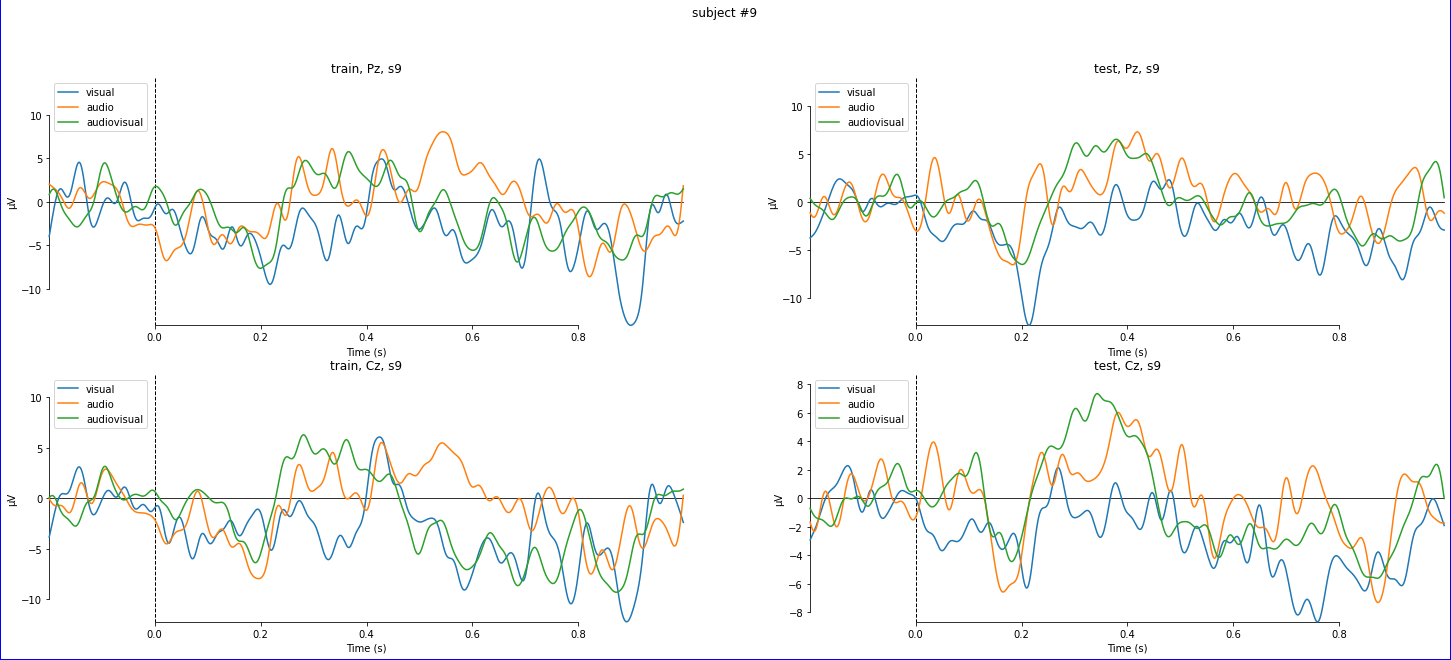

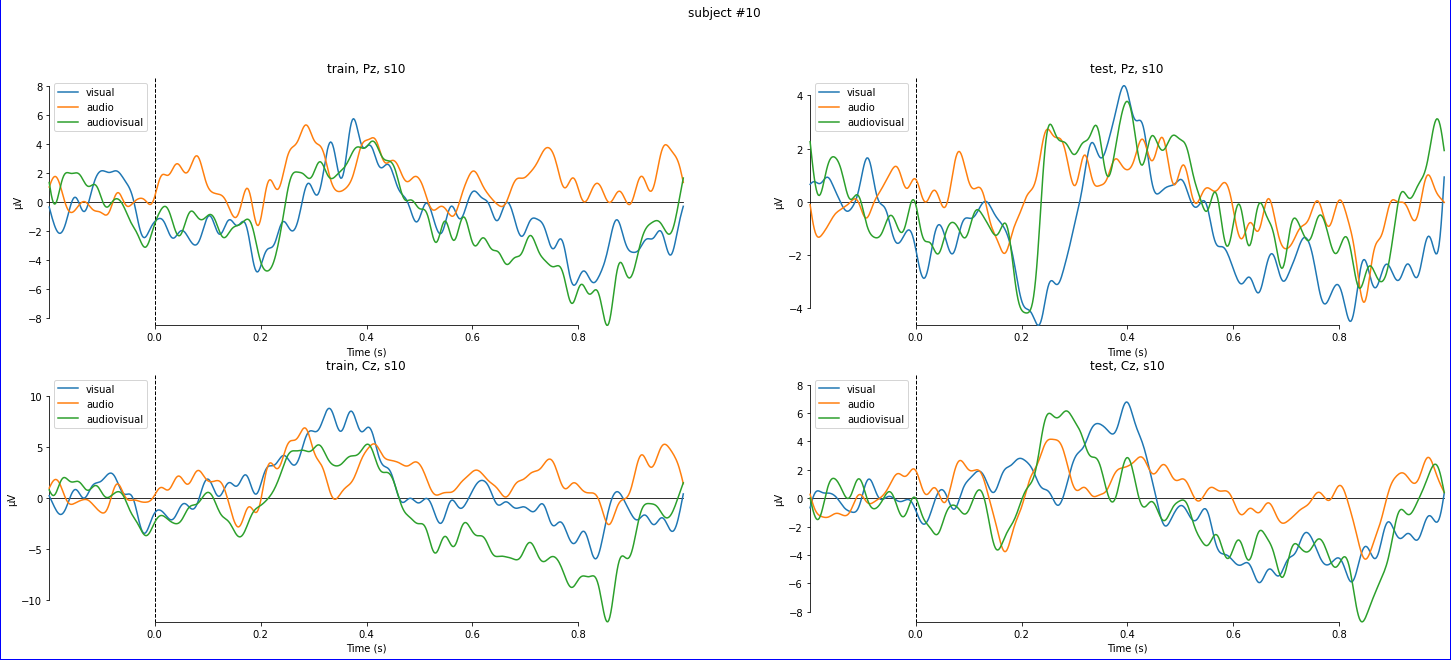

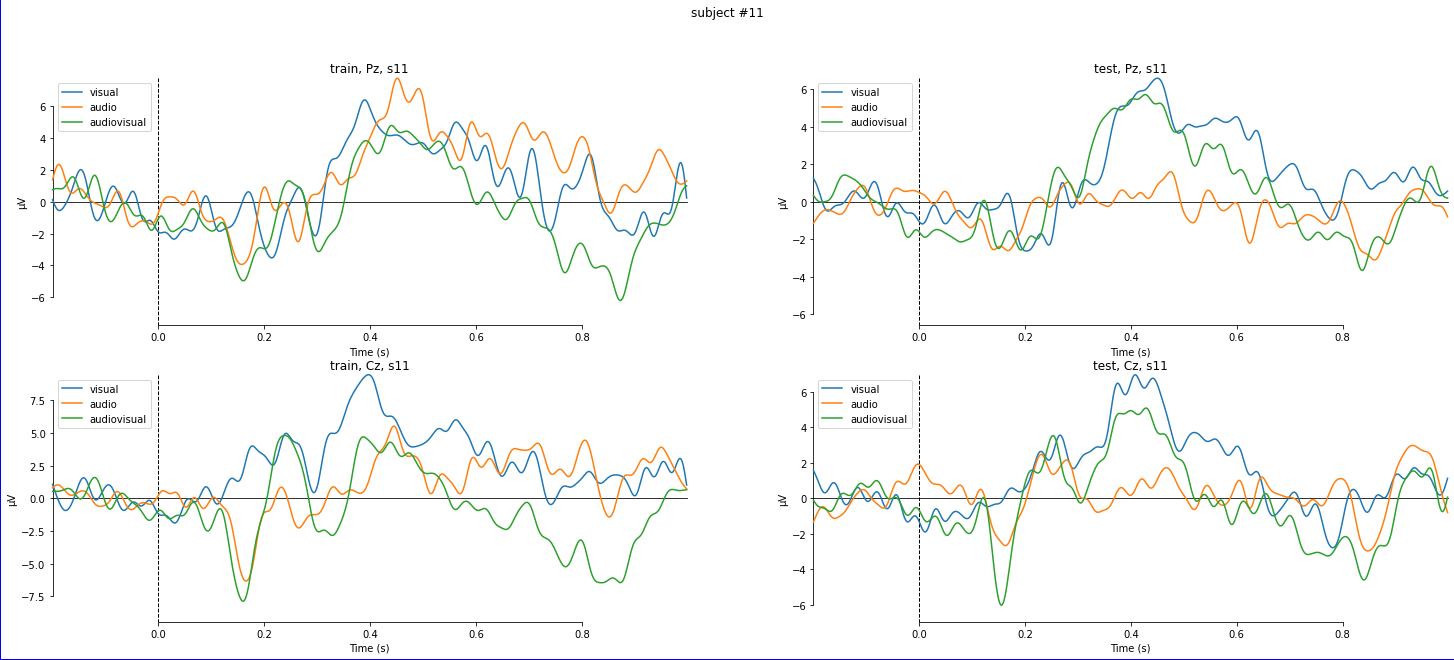

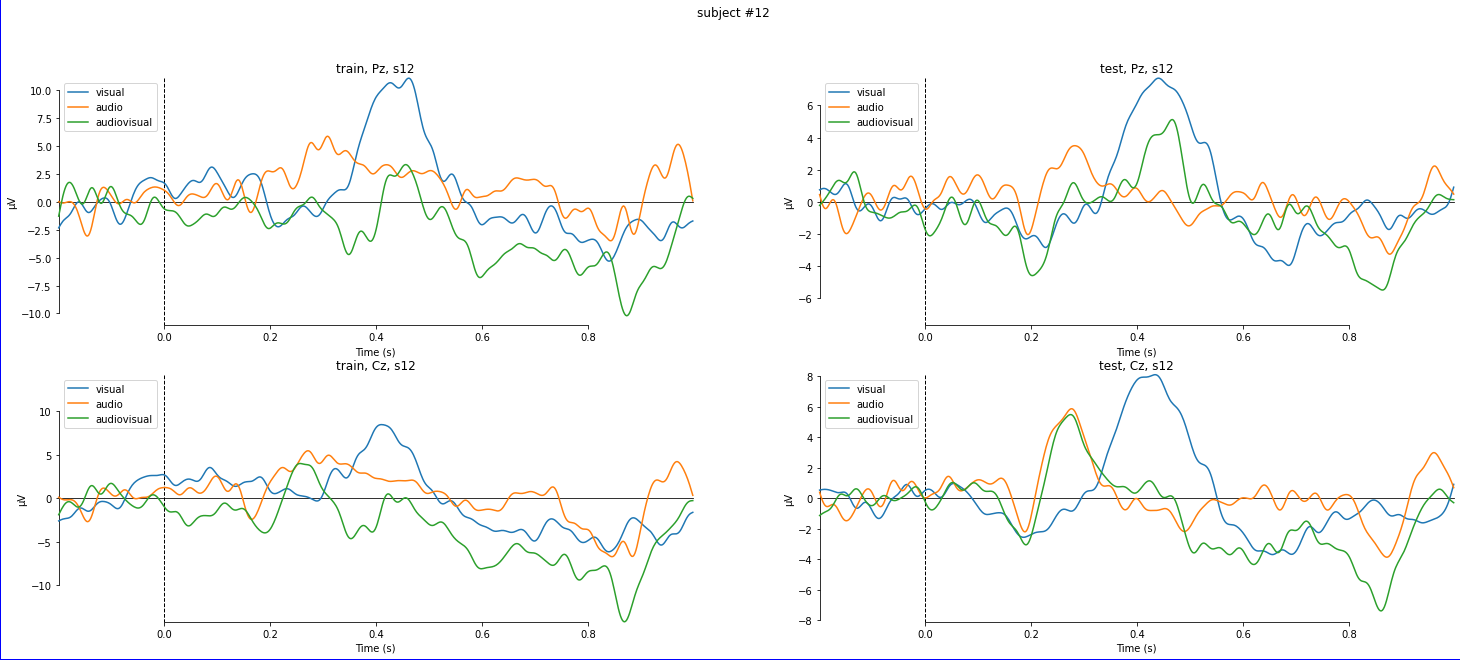

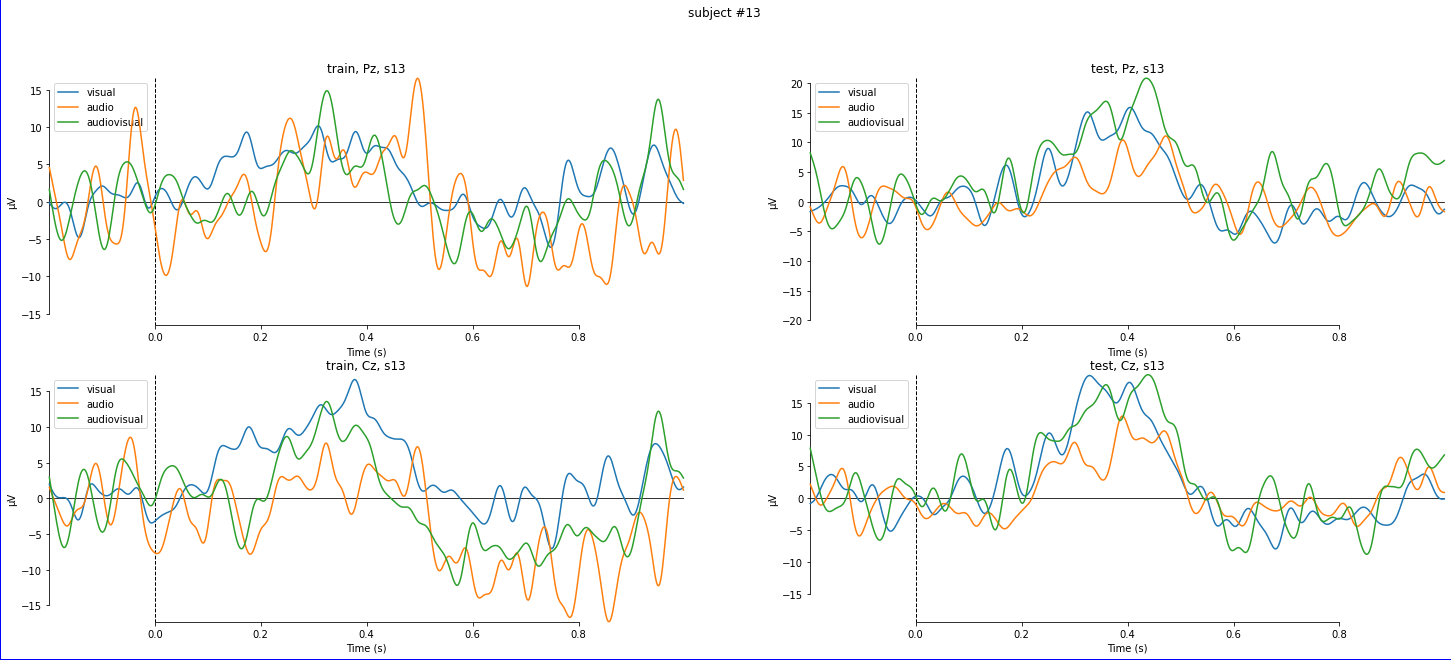

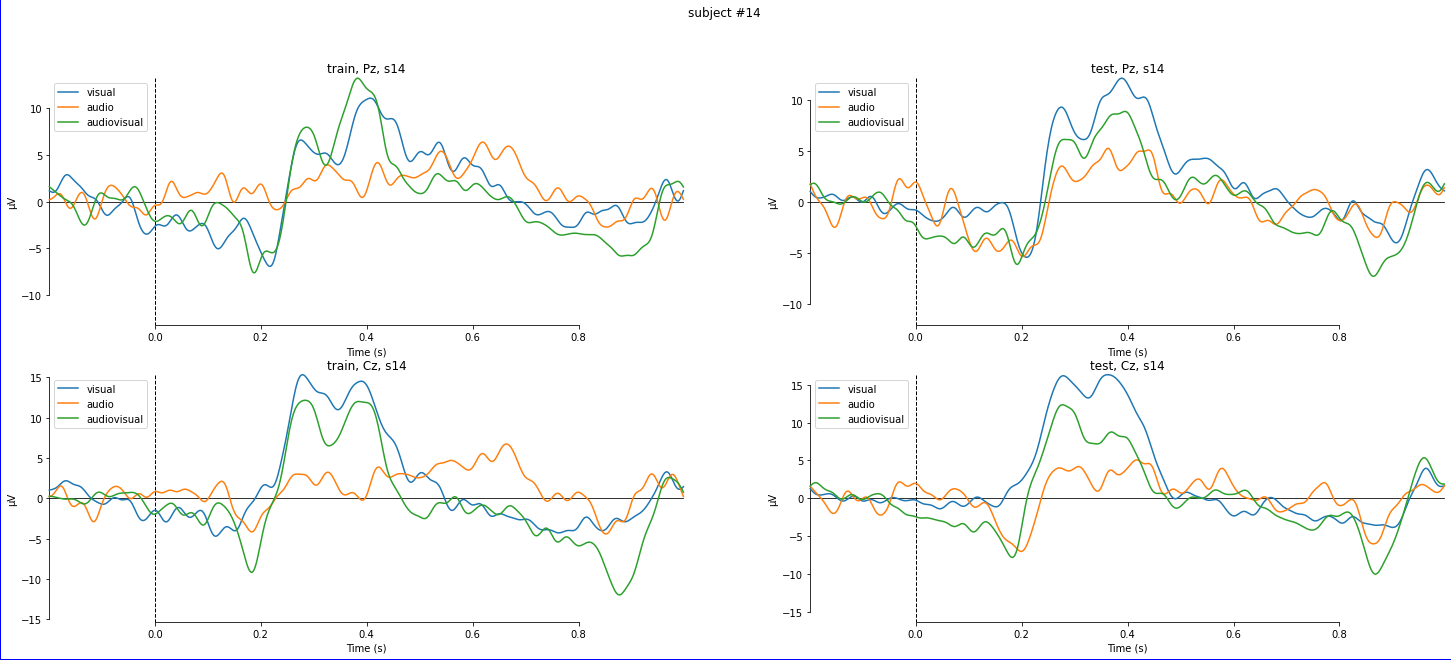

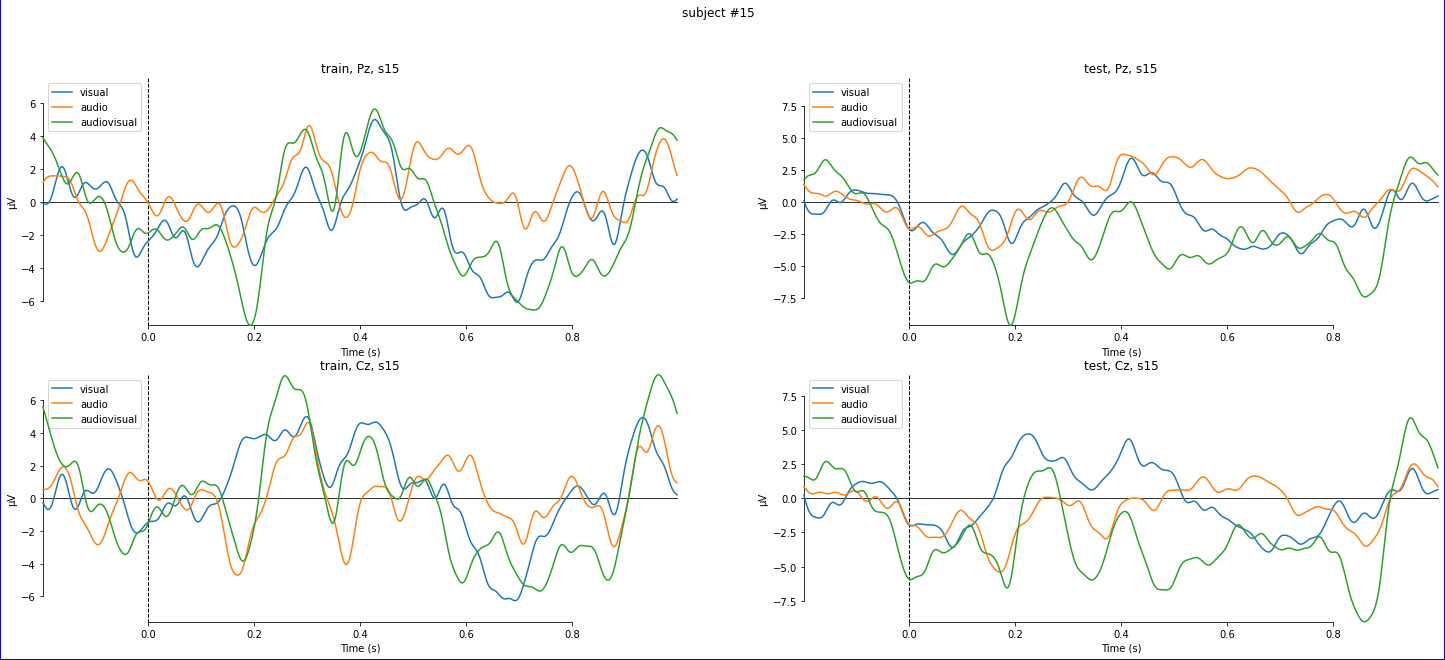

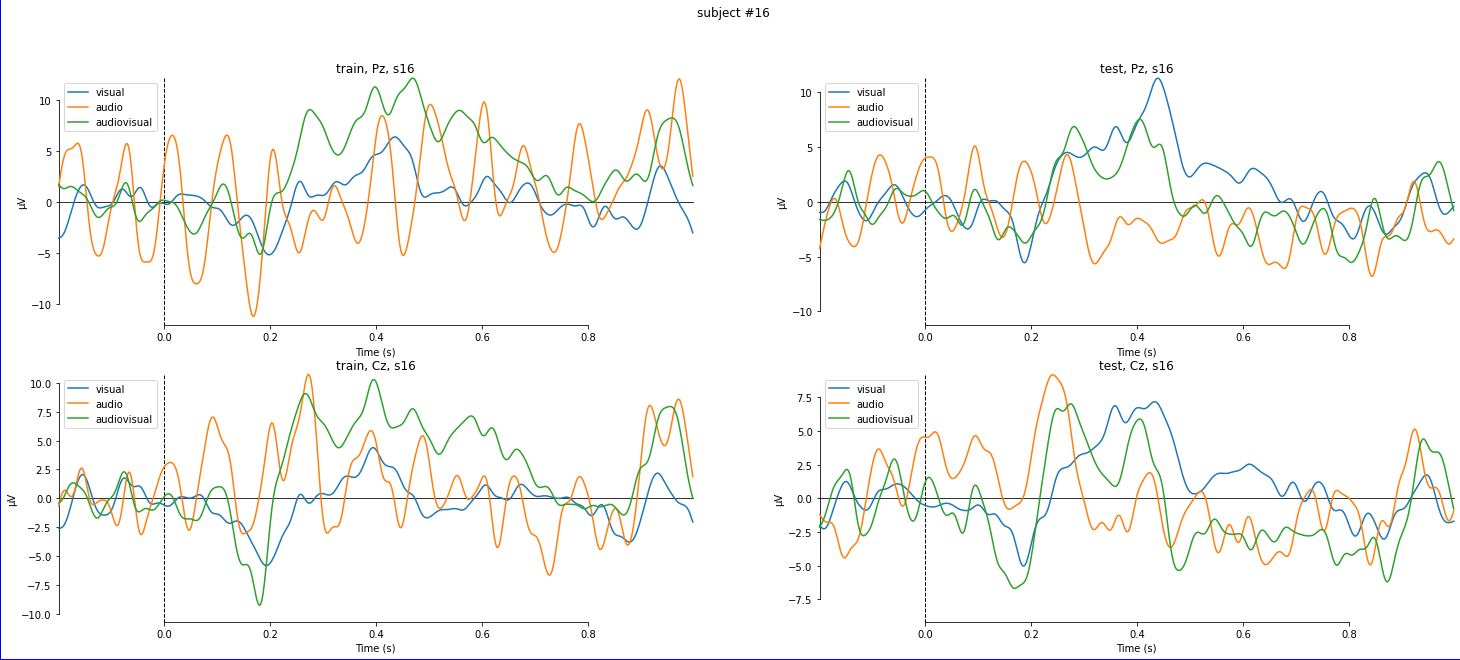

In [ ]:
import matplotlib.pyplot as plt

# plots averaged epochs for each subject, for Pz and Cz electrode and train/test data separately
for subject in range(1,17):
  fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(25, 10), linewidth=0.1, edgecolor='blue')
  y = 0
  for _set in (consts.TAG_TRAIN, consts.TAG_TEST):
    x = 0
    if not (subject == 4 and _set == consts.TAG_TRAIN):
      visual_epochs = data_bandpass[_set][consts.TAG_TARGET][consts.TAG_VISUAL][f'subject_{subject}']
      audio_epochs = data_bandpass[_set][consts.TAG_TARGET][consts.TAG_AUDIO][f'subject_{subject}']
      audiovisual_epochs = data_bandpass[_set][consts.TAG_TARGET][consts.TAG_AUDIOVISUAL][f'subject_{subject}']

      for ch in ('Pz', 'Cz'):
        # create figures
        mne.viz.plot_compare_evokeds(dict(
            visual=visual_epochs.average(picks=(ch,)),
            audio=audio_epochs.average(picks=(ch,)),
            audiovisual=audiovisual_epochs.average(picks=(ch,))),
            title=f'{_set}, {ch}, s{subject}', axes=axes[x, y], show=False,
            show_sensors=False)
        x = x + 1
    y = y + 1
  fig.suptitle(f"subject #{subject}")
  plt.show()

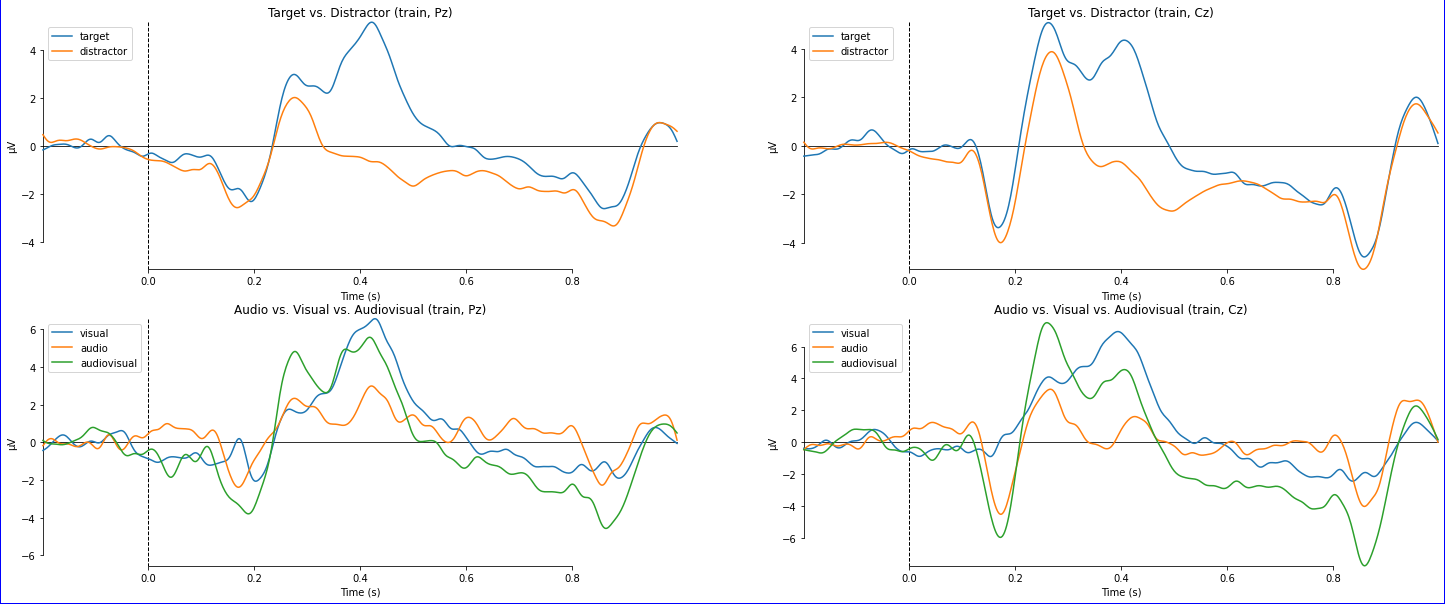

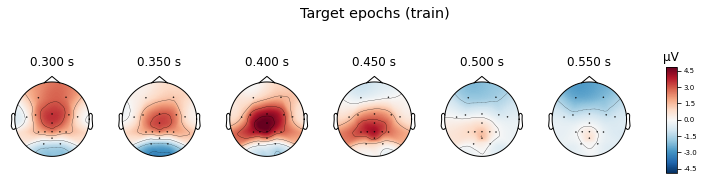

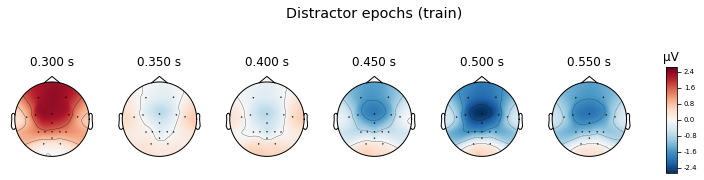

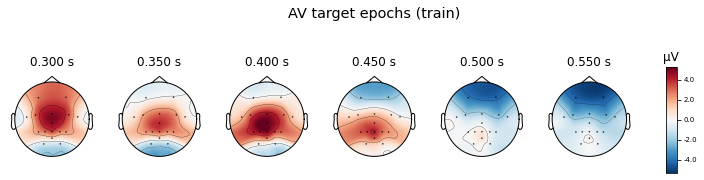

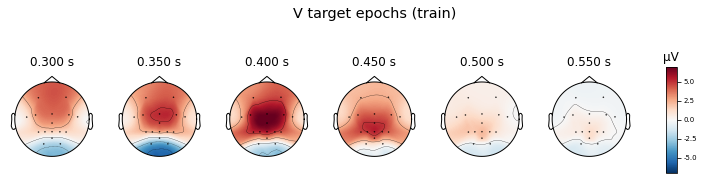

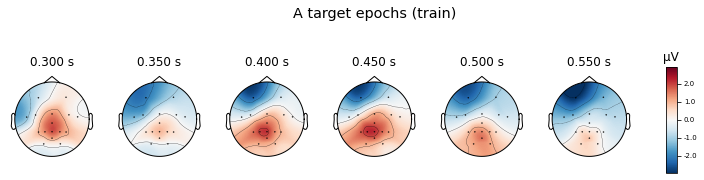

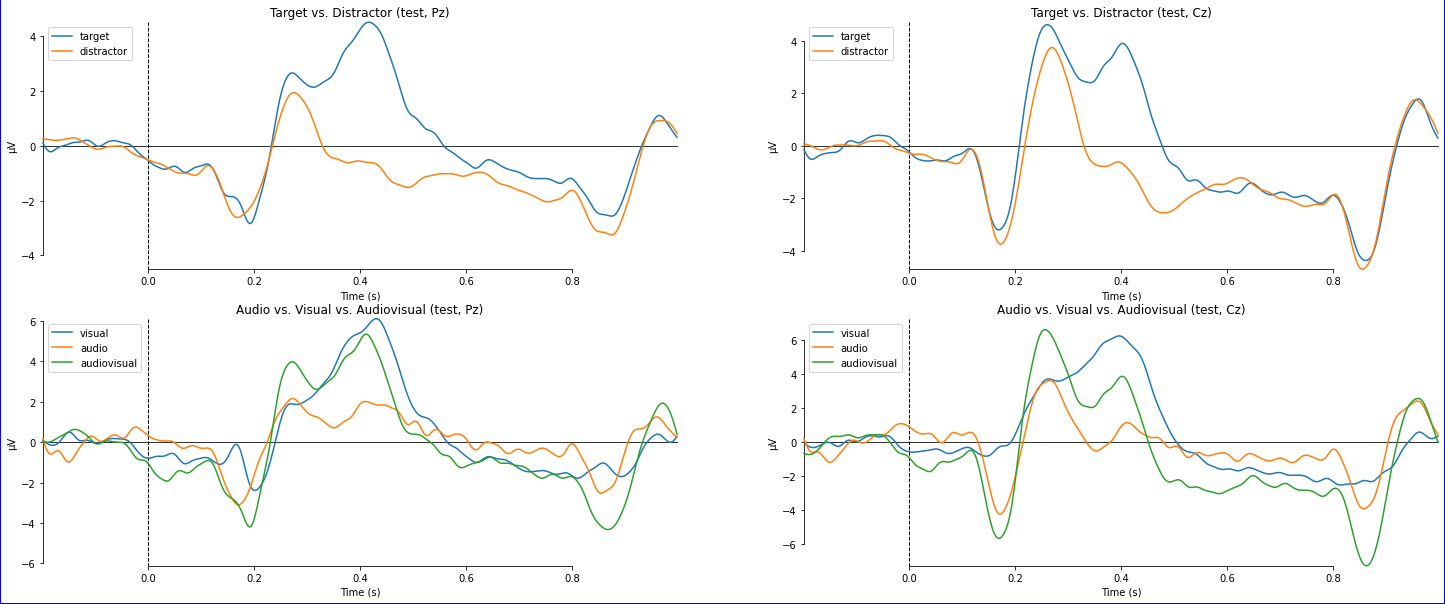

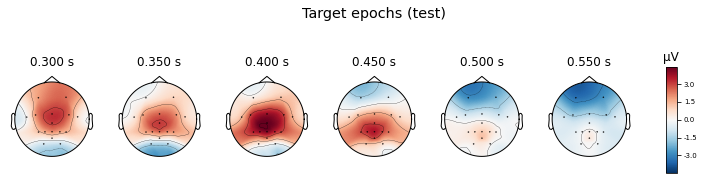

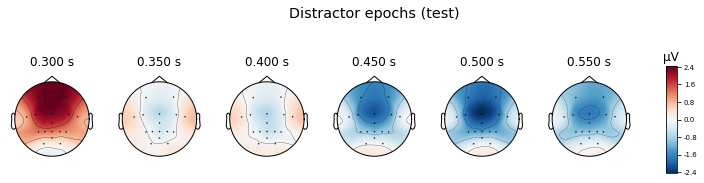

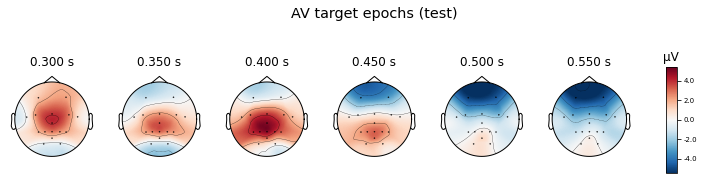

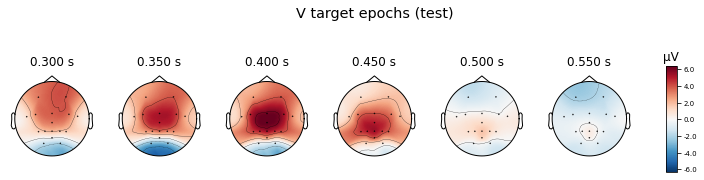

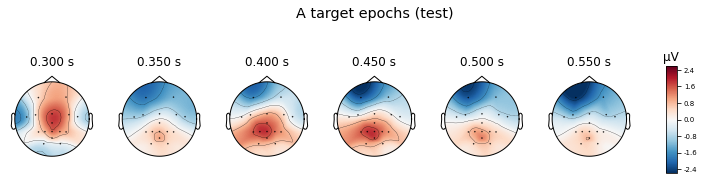

In [ ]:
# the time range defining the window for scalp map plots
times = np.arange(0.3, 0.6, 0.05)
avg = 0.025

# plots over-all-subjects averaged epochs for selected electrodes and scalp maps
for _set in (consts.TAG_TRAIN, consts.TAG_TEST):
  target_epochs = data_bandpass[_set][consts.TAG_TARGET]
  distractor_epochs = data_bandpass[_set][consts.TAG_NON_TARGET]
  visual_epochs = data_bandpass[_set][consts.TAG_TARGET][consts.TAG_VISUAL]
  audio_epochs = data_bandpass[_set][consts.TAG_TARGET][consts.TAG_AUDIO]
  audiovisual_epochs = data_bandpass[_set][consts.TAG_TARGET][consts.TAG_AUDIOVISUAL]

  fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(25, 10), linewidth=0.1, edgecolor='blue')
  y = 0
  for ch in ('Pz', 'Cz'):
    x = 0
    mne.viz.plot_compare_evokeds(dict(target=target_epochs.average(picks=(ch)), distractor=distractor_epochs.average(picks=(ch))),
                               legend='upper left', show_sensors=False, title=f'Target vs. Distractor ({_set}, {ch})', axes=axes[x, y], show=False)
    x = x + 1
    mne.viz.plot_compare_evokeds(dict(visual=visual_epochs.average(picks=(ch,)),
                                  audio=audio_epochs.average(picks=(ch,)),
                                  audiovisual=audiovisual_epochs.average(picks=(ch,))),
                               legend='upper left', show_sensors=False, title=f'Audio vs. Visual vs. Audiovisual ({_set}, {ch})', axes=axes[x, y], show=False)
    y = y + 1
  plt.show()
    
  target_epochs.average().plot_topomap(times=times, average=avg, ncols=8, nrows='auto', title=f'Target epochs ({_set})')
  distractor_epochs.average().plot_topomap(times=times, average=avg, ncols=8, nrows='auto',
                                            title=f'Distractor epochs ({_set})')
  audiovisual_epochs.average().plot_topomap(times=times, average=avg, ncols=8, nrows='auto',
                                            title=f'AV target epochs ({_set})')
  visual_epochs.average().plot_topomap(times=times, average=avg, ncols=8, nrows='auto',
                                        title=f'V target epochs ({_set})')
  audio_epochs.average().plot_topomap(times=times, average=avg, ncols=8, nrows='auto',
                                      title=f'A target epochs ({_set})')
  
    

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# calculates metrics for the classification test results
def evaluate(metrics, y_true, y_pred):
    result = {}
    if 'confusion_matrix' in metrics:
        result['confusion_matrix'] = confusion_matrix(y_true, y_pred)
    if 'recall' in metrics:
        result['recall'] = recall_score(y_true, y_pred, average=None)
    if 'precision' in metrics:
        result['precision'] = precision_score(y_true, y_pred, average=None)
    return result

# plots the classification results
def plot_results(target_y_true, target_y_estimated, audiovisual_y_true, audiovisual_y_estimated):
    result = {}
    result[consts.CLASSIFICATION_TYPES[0]] = evaluate(consts.METRICS, target_y_true, target_y_estimated)
    result[consts.CLASSIFICATION_TYPES[1]] = evaluate(consts.METRICS, audiovisual_y_true, audiovisual_y_estimated)
    for res in result:
        print(f"{res}: {result[res]}")
        if "confusion_matrix" in result[res]:
            labels = [str(x) for (x, _) in enumerate(result[res]["confusion_matrix"])]
            ConfusionMatrixDisplay(result[res]["confusion_matrix"], display_labels=labels).plot()
        if "recall" in result[res] and "precision" in result[res]:
            PrecisionRecallDisplay(precision=result[res]["precision"], recall=result[res]["recall"]).plot()
        plt.show()

Epoch 1/30
57/57 [==============================] - 38s 647ms/step - loss: 0.8871 - sparse_categorical_accuracy: 0.6231
Epoch 2/30
57/57 [==============================] - 36s 627ms/step - loss: 0.5946 - sparse_categorical_accuracy: 0.7317
Epoch 3/30
57/57 [==============================] - 36s 626ms/step - loss: 0.4782 - sparse_categorical_accuracy: 0.7919
Epoch 4/30
57/57 [==============================] - 36s 625ms/step - loss: 0.4180 - sparse_categorical_accuracy: 0.8240
Epoch 5/30
57/57 [==============================] - 36s 625ms/step - loss: 0.3919 - sparse_categorical_accuracy: 0.8397
Epoch 6/30
57/57 [==============================] - 35s 620ms/step - loss: 0.3707 - sparse_categorical_accuracy: 0.8506
Epoch 7/30
57/57 [==============================] - 35s 620ms/step - loss: 0.3441 - sparse_categorical_accuracy: 0.8610
Epoch 8/30
57/57 [==============================] - 35s 622ms/step - loss: 0.3259 - sparse_categorical_accuracy: 0.8654
Epoch 9/30
57/57 [======================

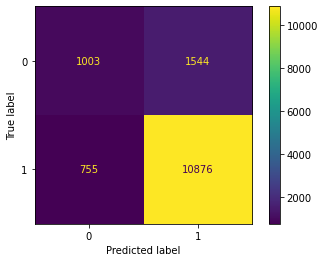

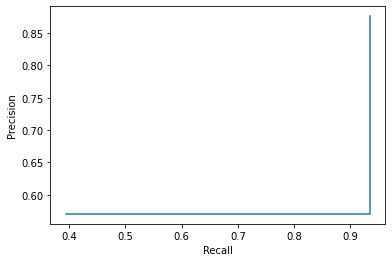

audiovisual: {'confusion_matrix': array([[621,  74, 264],
       [170, 286, 303],
       [192,  80, 557]]), 'recall': array([0.64754953, 0.37681159, 0.67189385]), 'precision': array([0.63173957, 0.65      , 0.4955516 ])}


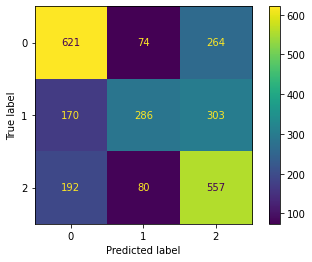

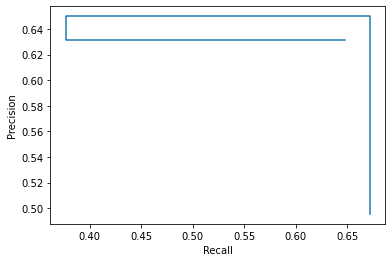

In [ ]:
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import ShuffleSplit, cross_validate

# constructs the CNN for target vs. distractor classification
def keras_model_target(name):
    inputs = keras.Input(shape=(9824,))
    x = layers.Reshape((16, 614, 1))(inputs)
    x = layers.Conv2D(filters=6, kernel_size=(3, 3), activation=keras.activations.elu)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5, seed=0)(x)
    x = layers.AveragePooling2D(pool_size=(1, 8))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(100, activation=keras.activations.elu)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5, seed=0)(x)
    outputs = layers.Dense(2, activation=keras.activations.softmax)(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name=name)
    return model

# constructs the CNN for audio vs. visual vs. audiovisual classification
def keras_model_audiovisual(name):
    inputs = keras.Input(shape=(9824,))
    x = layers.Reshape((16, 614, 1))(inputs)
    x = layers.Conv2D(filters=6, kernel_size=(3, 3), activation=keras.activations.elu)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5, seed=0)(x)
    x = layers.AveragePooling2D(pool_size=(1, 8))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(100, activation=keras.activations.elu)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5, seed=0)(x)
    outputs = layers.Dense(3, activation=keras.activations.softmax)(x)
    model = keras.Model(inputs=inputs, outputs=outputs, name=name)
    return model

# process the data 
target_X_train, target_y_train = dm.get_target_split()
target_X_test, target_y_test = dm.get_target_split(test=True)
audiovisual_X_train, audiovisual_y_train = dm.get_experiment_split()
audiovisual_X_test, audiovisual_y_test = dm.get_experiment_split(test=True)

target_X_train = DataManager.flatten(target_X_train)
target_X_test = DataManager.flatten(target_X_test)
audiovisual_X_train = DataManager.flatten(audiovisual_X_train)
audiovisual_X_test = DataManager.flatten(audiovisual_X_test)

# create pipeline for target vs. distractor
cnn2_pipeline = make_pipeline(TomekLinks(), StandardScaler(), KerasClassifier(
                model=keras_model_target,
                loss=SparseCategoricalCrossentropy(),
                name="model_target",
                optimizer=Adam(),
                metrics=[SparseCategoricalAccuracy()],
                epochs=30,
                batch_size=128,
            ))
cnn2_pipeline.fit(target_X_train, target_y_train)
target_y_estimated = cnn2_pipeline.predict(target_X_test)
# prints report with additional metrics for imbalanced datasets
print(classification_report_imbalanced(target_y_test, target_y_estimated))

# create pipeline for audio vs. visual vs. audiovisual
cnn3_pipeline = make_pipeline(TomekLinks(), StandardScaler(), KerasClassifier(
                model=keras_model_audiovisual,
                loss=SparseCategoricalCrossentropy(),
                name="model_audiovisual",
                optimizer=Adam(),
                metrics=[SparseCategoricalAccuracy()],
                epochs=30,
                batch_size=128
            ))
cnn3_pipeline.get_params()
cnn3_pipeline.fit(audiovisual_X_train, audiovisual_y_train)
audiovisual_y_estimated = cnn3_pipeline.predict(audiovisual_X_test)
print(classification_report_imbalanced(audiovisual_y_test, audiovisual_y_estimated))
plot_results(target_y_test, target_y_estimated, audiovisual_y_test, audiovisual_y_estimated)

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.65      0.42      0.95      0.51      0.63      0.38      2547
        1.0       0.88      0.95      0.42      0.92      0.63      0.42     11631

avg / total       0.84      0.86      0.51      0.84      0.63      0.41     14178

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.63      0.63      0.78      0.63      0.70      0.48       959
        1.0       0.60      0.60      0.83      0.60      0.71      0.49       759
        2.0       0.53      0.52      0.77      0.53      0.64      0.39       829

avg / total       0.59      0.59      0.79      0.59      0.68      0.46      2547

target: {'confusion_matrix': array([[ 1067,  1480],
       [  574, 11057]]), 'recall': array([0.41892422, 0.95064913]), 'precision': array([0.65021328, 0.88194943])}


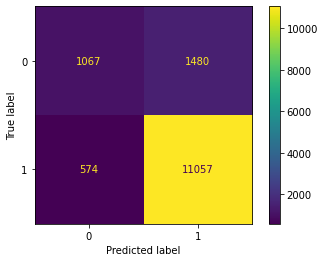

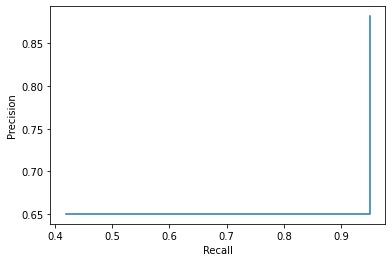

audiovisual: {'confusion_matrix': array([[606, 146, 207],
       [122, 457, 180],
       [231, 165, 433]]), 'recall': array([0.63190824, 0.60210804, 0.52231604]), 'precision': array([0.63190824, 0.59505208, 0.52804878])}


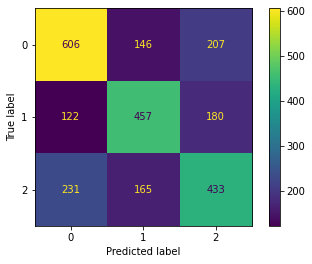

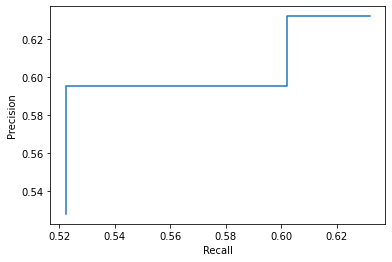

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# donwsample the features
dm.data = dm.data.resample(sfreq=32/1.2)

target_X_train, target_y_train = dm.get_target_split()
target_X_test, target_y_test = dm.get_target_split(test=True)
audiovisual_X_train, audiovisual_y_train = dm.get_experiment_split()
audiovisual_X_test, audiovisual_y_test = dm.get_experiment_split(test=True)

target_X_train = DataManager.flatten(target_X_train)
target_X_test = DataManager.flatten(target_X_test)
audiovisual_X_train = DataManager.flatten(audiovisual_X_train)
audiovisual_X_test = DataManager.flatten(audiovisual_X_test)

lda_pipeline = make_pipeline(TomekLinks(), StandardScaler(), LinearDiscriminantAnalysis())

# classify target vs. distractor with LDA
lda_pipeline.fit(target_X_train, target_y_train)
target_y_estimated = lda_pipeline.predict(target_X_test)
# classify audio vs. visual vs. audiovisual with LDA
lda_pipeline.fit(audiovisual_X_train, audiovisual_y_train)
audiovisual_y_estimated = lda_pipeline.predict(audiovisual_X_test)

print(classification_report_imbalanced(target_y_test, target_y_estimated))
print(classification_report_imbalanced(audiovisual_y_test, audiovisual_y_estimated))
plot_results(target_y_test, target_y_estimated, audiovisual_y_test, audiovisual_y_estimated)